In [1]:
from matplotlib import pyplot as plt
import librosa
import librosa.display
import numpy as np

In [18]:
aud_file1 = "audio_sensor_1.wav"
aud_file2 = "audio_sensor_2.wav"
aud_file3 = "audio_sensor_3.wav"
aud_file4 = "audio_sensor_4.wav"

In [20]:
aud1, SR1 = librosa.load(aud_file1, sr=22050)
aud2, SR2 = librosa.load(aud_file2, sr=22050)
aud3, SR3 = librosa.load(aud_file3, sr=22050)
aud4, SR4 = librosa.load(aud_file4, sr=22050)


Text(0.5, 1.0, 'audio sensors 1')

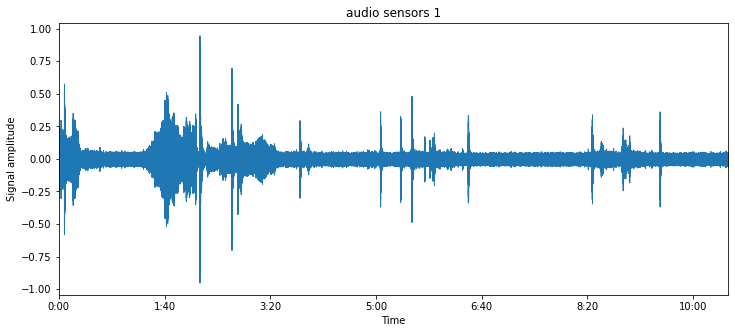

In [24]:
# %% Plot signal waves 
plt.figure(figsize=(12,5))
librosa.display.waveplot(aud1, sr=SR1)
plt.ylabel("Signal amplitude")
plt.title("audio sensors 1")

Text(0.5, 1.0, 'audio sensor 2')

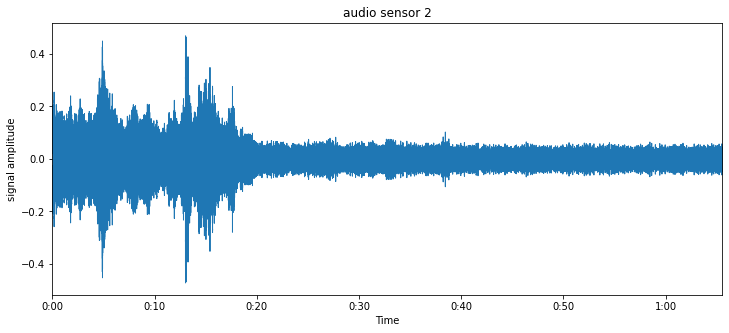

In [25]:
plt.figure(figsize = (12,5))
librosa.display.waveplot(aud2, sr=SR2)
plt.ylabel("signal amplitude")
plt.title("audio sensor 2")


Text(0.5, 1.0, 'audio sensor 3')

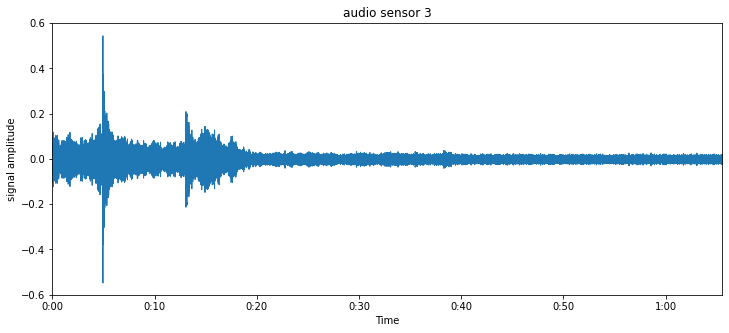

In [26]:
plt.figure(figsize = (12,5))
librosa.display.waveplot(aud3, sr=SR3)
plt.ylabel("signal amplitude")
plt.title("audio sensor 3")

Text(0.5, 1.0, 'audio sensor 4')

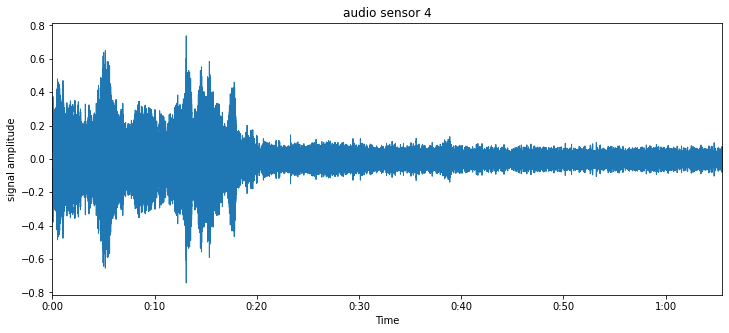

In [27]:
plt.figure(figsize = (12,5))
librosa.display.waveplot(aud4, sr=SR4)
plt.ylabel("signal amplitude")
plt.title("audio sensor 4")

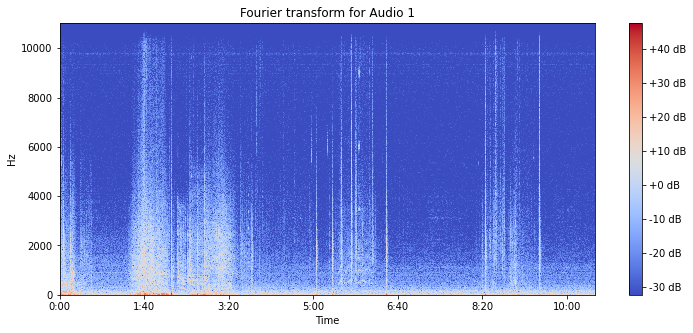

In [28]:
X = librosa.stft(aud1)
X_db = librosa.amplitude_to_db(np.abs(X))


fig, ax = plt.subplots(figsize = (12, 5))
img = librosa.display.specshow(X_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Fourier transform for Audio 1')
fig.colorbar(img, ax=ax, format="%+2.f dB")

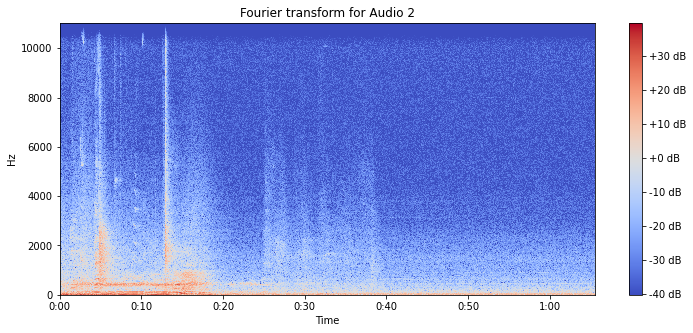

In [29]:
X = librosa.stft(aud2)
X_db = librosa.amplitude_to_db(np.abs(X))


fig, ax = plt.subplots(figsize = (12, 5))
img = librosa.display.specshow(X_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Fourier transform for Audio 2')
fig.colorbar(img, ax=ax, format="%+2.f dB")

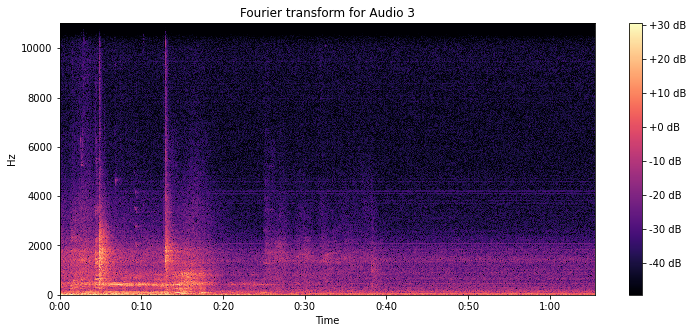

In [30]:
X = librosa.stft(aud3)
X_db = librosa.amplitude_to_db(np.abs(X))


fig, ax = plt.subplots(figsize = (12, 5))
img = librosa.display.specshow(X_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Fourier transform for Audio 3')
fig.colorbar(img, ax=ax, format="%+2.f dB")

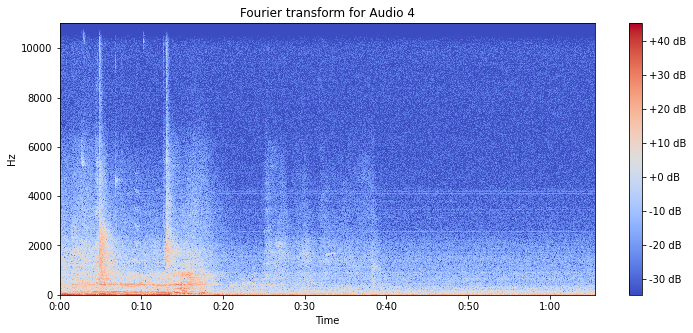

In [31]:
X = librosa.stft(aud4)
X_db = librosa.amplitude_to_db(np.abs(X))


fig, ax = plt.subplots(figsize = (12, 5))
img = librosa.display.specshow(X_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Fourier transform for Audio 4')
fig.colorbar(img, ax=ax, format="%+2.f dB")

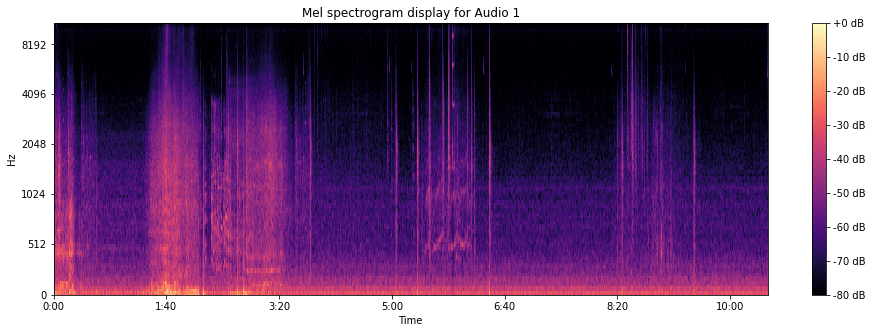

In [54]:
fig, ax = plt.subplots(figsize = (16, 5))
M1 = librosa.feature.melspectrogram(y=aud1, sr=SR1)
M_db = librosa.power_to_db(M1, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display for Audio 1')
fig.colorbar(img, ax=ax, format="%+2.f dB")

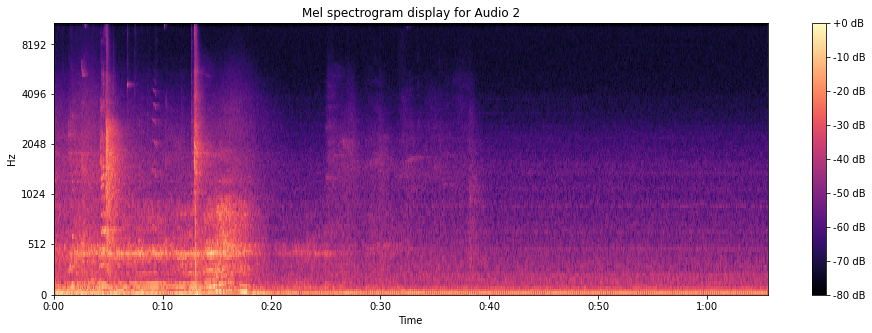

In [55]:
fig, ax = plt.subplots(figsize = (16, 5))
M2 = librosa.feature.melspectrogram(y=aud2, sr=SR2)
M_db = librosa.power_to_db(M2, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display for Audio 2')
fig.colorbar(img, ax=ax, format="%+2.f dB")

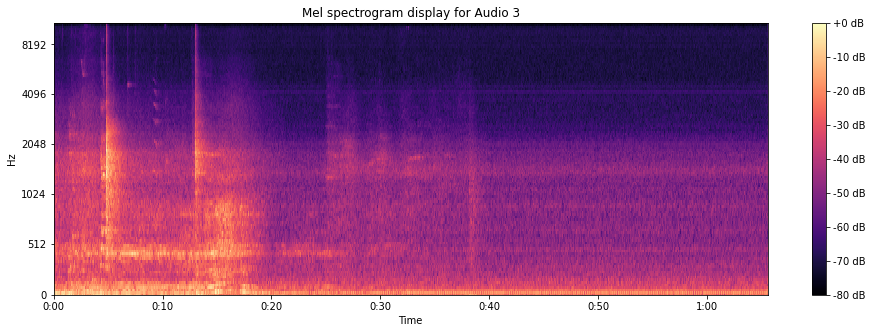

In [56]:
fig, ax = plt.subplots(figsize = (16, 5))
M3 = librosa.feature.melspectrogram(y=aud3, sr=SR3)
M_db = librosa.power_to_db(M3, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display for Audio 3')
fig.colorbar(img, ax=ax, format="%+2.f dB")

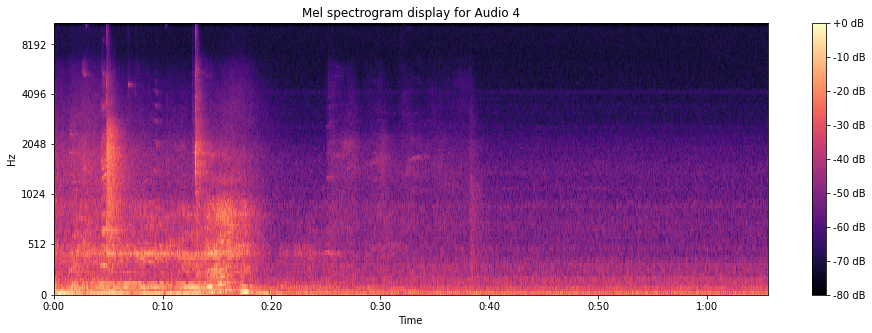

In [57]:
fig, ax = plt.subplots(figsize = (16, 5))
M4 = librosa.feature.melspectrogram(y=aud4, sr=SR4)
M_db = librosa.power_to_db(M4, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display for Audio 4')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [38]:
import pandas as pd
import numpy as np
import base64
import imageio as iio
from plotting import Plotting
import plotly.graph_objects as go

In [39]:
df_events = pd.read_pickle('site_6.pkl', compression='gzip')
df_events.loc[:, 'timestamp'] = (pd.to_datetime(df_events['timestamp'], utc=True)
                                 .dt.tz_convert('Europe/Helsinki')
                                 .dt.tz_localize(None))

print(df_events.shape)

df_devices = pd.read_json('site_6.json')
with open('site_6.png', "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()
img = iio.imread('site_6.png')
print(img.shape)


(913, 2)
(1317, 2635, 4)



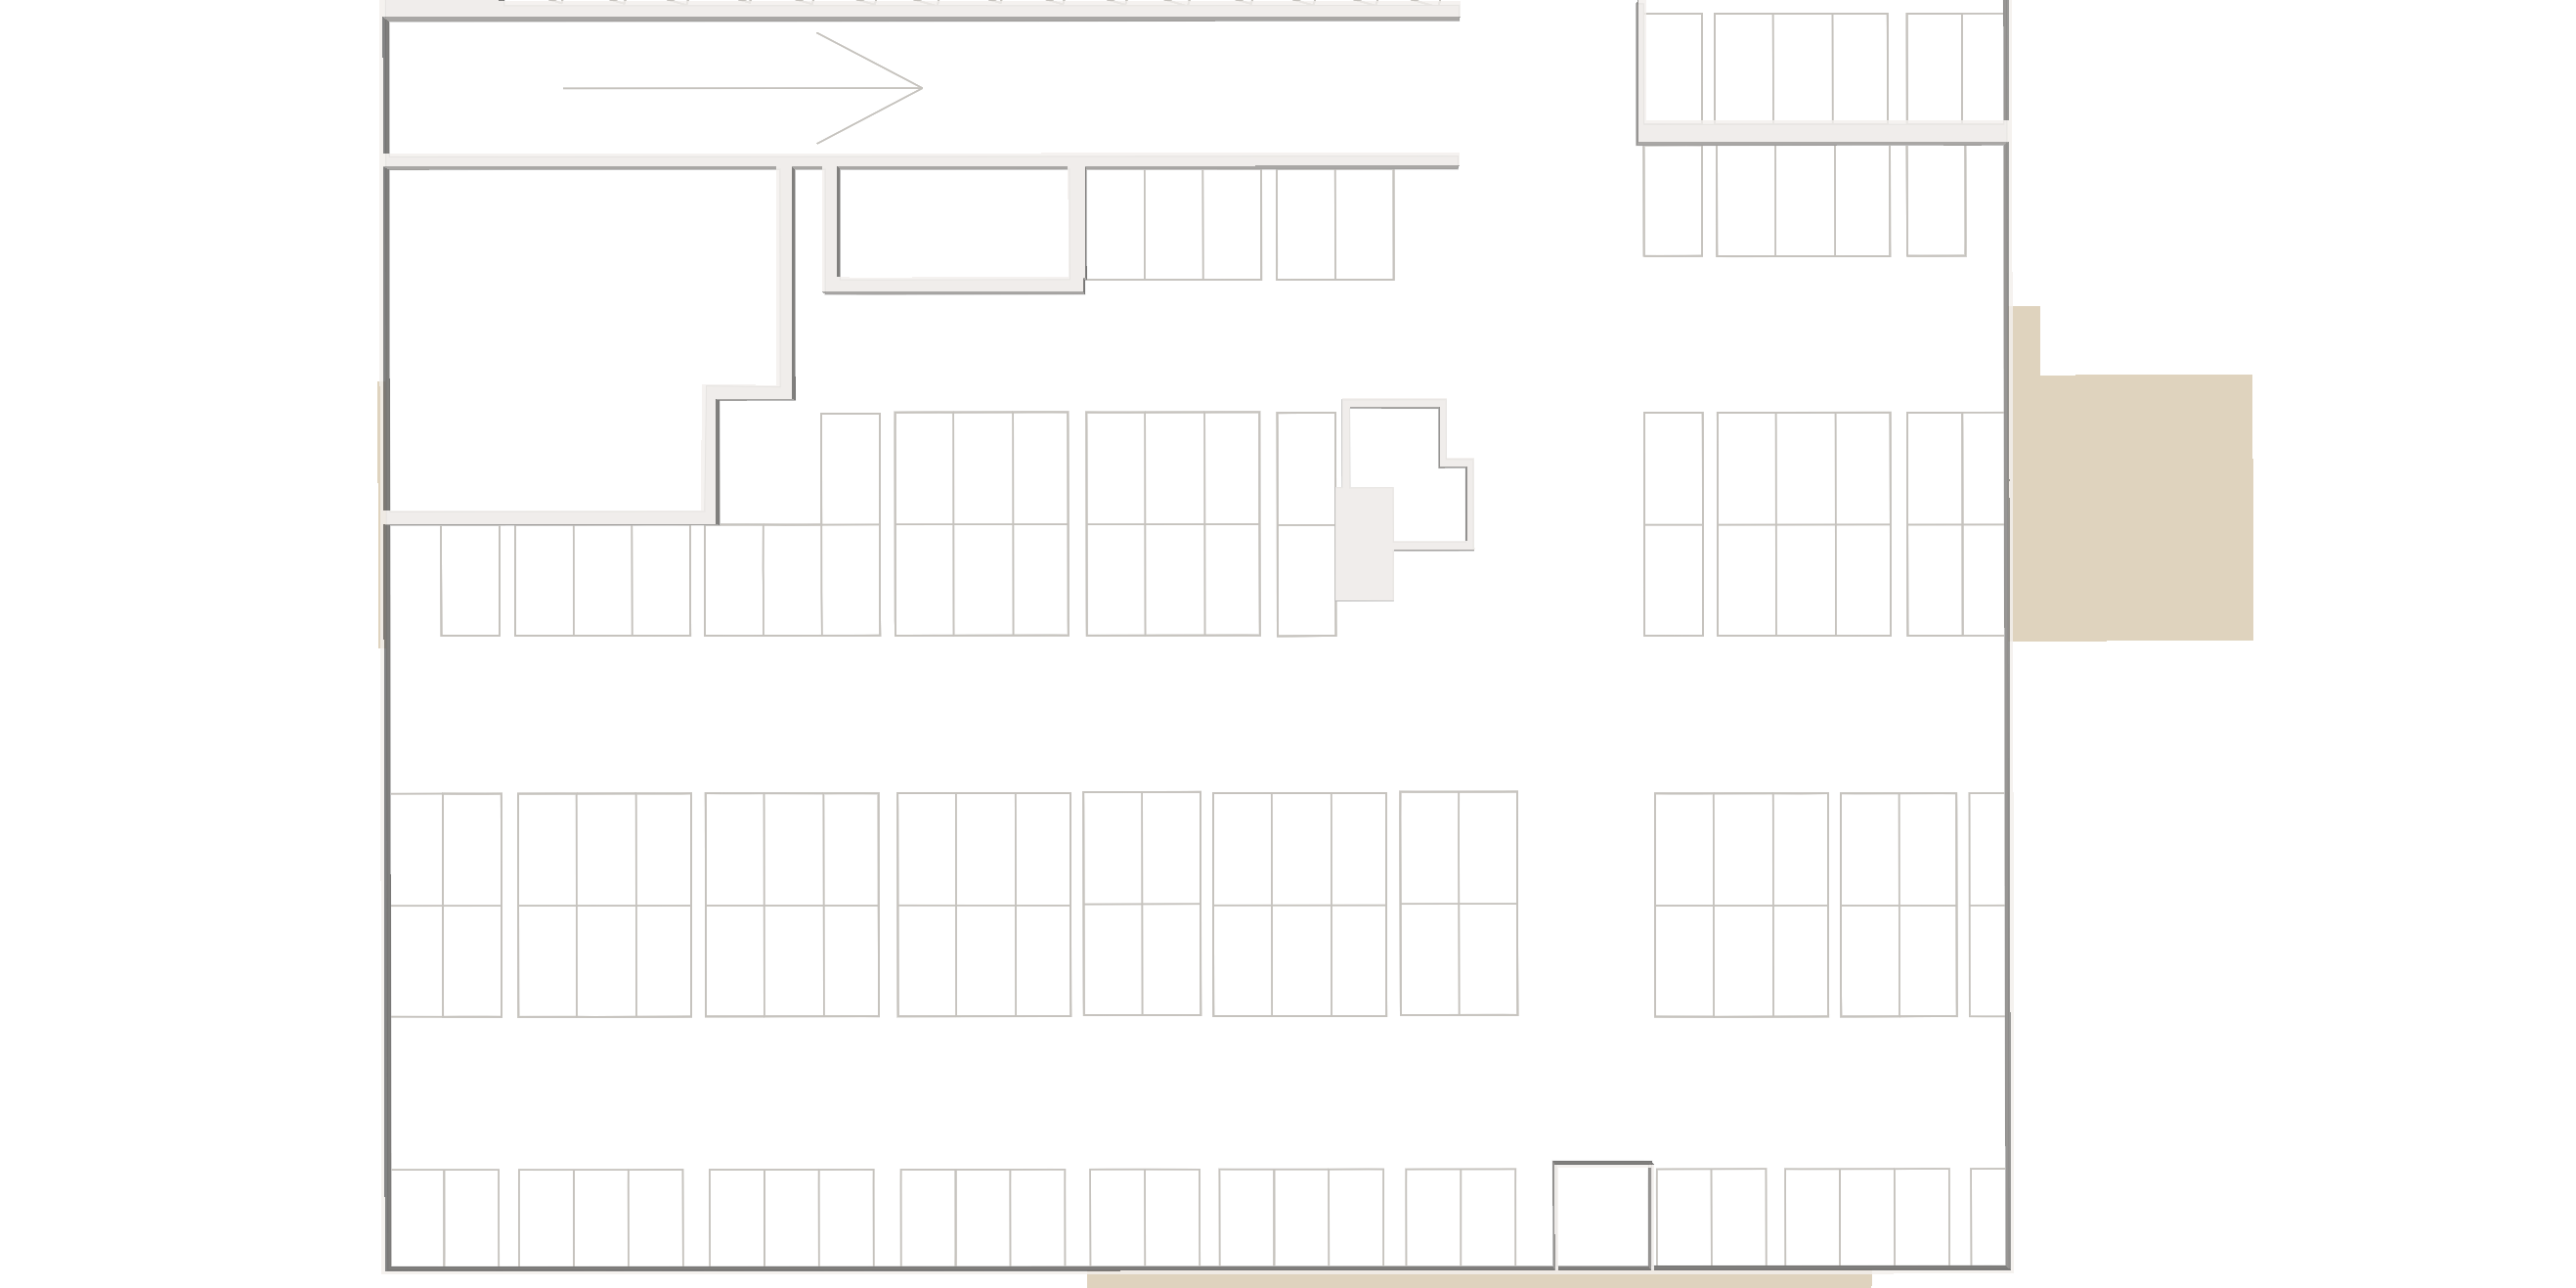

In [52]:
scaling_factor = 3 # Set to 1 for highest resolution
plotting_obj = Plotting(bg_img=encoded_string, dims=(img.shape[1], img.shape[0]), df_devices=df_devices, scaling_factor=scaling_factor)
plotting_obj.run(renderer= None) # Switch to iframe if you would like to view it here

df_events_day = df_events.copy()
df_events_day.loc[:, 'timestamp'] = df_events_day['timestamp'].dt.floor('1D')
df_events_day.loc[:, 'value'] = 1.0
df_events_day = df_events_day.groupby('timestamp').sum()
df_events_day = df_events_day.drop(['deviceid'], axis=1)
df_events_day = df_events_day.reindex(pd.date_range(df_events_day.index.min(), df_events_day.index.max(), freq='1D')).fillna(0)

fig = go.Figure(data=[go.Scatter(x=df_events_day.index, y=df_events_day['value'])],
                layout=dict(height=500, width=1000))
fig.show()

In [65]:
md1 = librosa.feature.delta(M1)
md2 = librosa.feature.delta(M2)
md3 = librosa.feature.delta(M3)
md4 = librosa.feature.delta(M4)
print(md1)

[[-4.2808022e+00 -4.2808022e+00 -4.2808022e+00 ... -2.6406899e-01
  -2.6406899e-01 -2.6406899e-01]
 [ 3.9533031e+00  3.9533031e+00  3.9533031e+00 ... -5.7146984e-01
  -5.7146984e-01 -5.7146984e-01]
 [-6.2344033e-01 -6.2344033e-01 -6.2344033e-01 ... -2.6226580e-02
  -2.6226580e-02 -2.6226580e-02]
 ...
 [-1.4404582e-05 -1.4404582e-05 -1.4404582e-05 ...  1.3305579e-05
   1.3305579e-05  1.3305579e-05]
 [-2.5139081e-05 -2.5139081e-05 -2.5139081e-05 ...  7.6936658e-06
   7.6936658e-06  7.6936658e-06]
 [-2.5732965e-05 -2.5732965e-05 -2.5732965e-05 ...  1.2455863e-05
   1.2455863e-05  1.2455863e-05]]


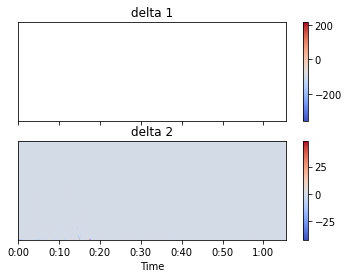

In [67]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img1 = librosa.display.specshow(md1, x_axis='time')
ax[0].set(title='delta 1')
ax[0].label_outer()
img2 = librosa.display.specshow(md2, ax=ax[1], x_axis='time')
ax[1].set(title=r'delta 2')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])


(27284,)
(27284,)
(27284,)


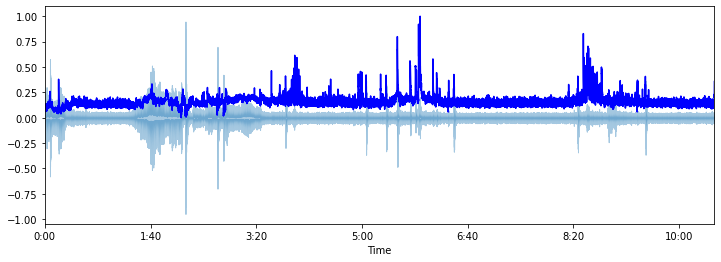

In [82]:
import sklearn
spectral_centroids1 = librosa.feature.spectral_centroid(aud1, sr=SR1)[0]
print(spectral_centroids1.shape)

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids1))
t = librosa.frames_to_time(frames)
print(t.shape)

spectral_centroids1 = (spectral_centroids1 - spectral_centroids1.min(axis=0)) / (spectral_centroids1.max(axis=0) - spectral_centroids1.min(axis=0))
spectral_centroids1 = spectral_centroids1 * (spectral_centroids1.max(axis =0) - spectral_centroids1.min(axis = 0)) + spectral_centroids1.min(axis=0)


#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(aud1, sr=SR1, alpha=0.4)
print(spectral_centroids1.shape)

plt.plot(t, spectral_centroids1, color='b')



(2823,)
(2823,)
(2823,)


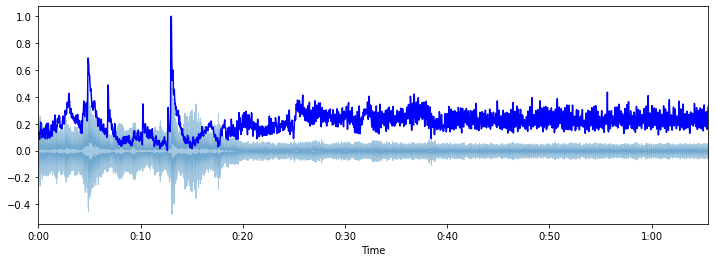

In [83]:
import sklearn
spectral_centroids2 = librosa.feature.spectral_centroid(aud2, sr=SR2)[0]
print(spectral_centroids2.shape)

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids2))
t = librosa.frames_to_time(frames)
print(t.shape)

spectral_centroids2 = (spectral_centroids2 - spectral_centroids2.min(axis=0)) / (spectral_centroids2.max(axis=0) - spectral_centroids2.min(axis=0))
spectral_centroids2 = spectral_centroids2 * (spectral_centroids2.max(axis =0) - spectral_centroids2.min(axis = 0)) + spectral_centroids2.min(axis=0)


#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(aud2, sr=SR2, alpha=0.4)
print(spectral_centroids2.shape)

plt.plot(t, spectral_centroids2, color='b')

(27284,)
(2823,)
(2823,)


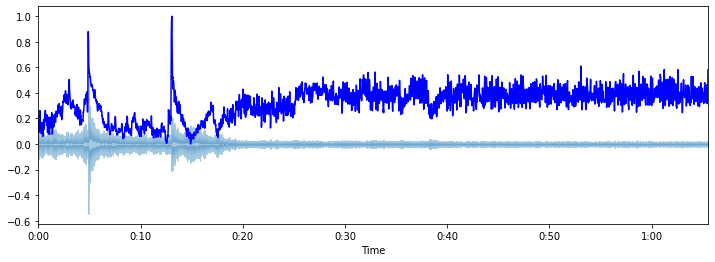

In [85]:
import sklearn
spectral_centroids3 = librosa.feature.spectral_centroid(aud3, sr=SR3)[0]
print(spectral_centroids1.shape)

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids3))
t = librosa.frames_to_time(frames)
print(t.shape)

spectral_centroids3 = (spectral_centroids3 - spectral_centroids3.min(axis=0)) / (spectral_centroids3.max(axis=0) - spectral_centroids3.min(axis=0))
spectral_centroids3 = spectral_centroids3 * (spectral_centroids3.max(axis =0) - spectral_centroids3.min(axis = 0)) + spectral_centroids3.min(axis=0)


#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(aud3, sr=SR3, alpha=0.4)
print(spectral_centroids3.shape)

plt.plot(t, spectral_centroids3, color='b')

(27284,)
(2823,)
(2823,)


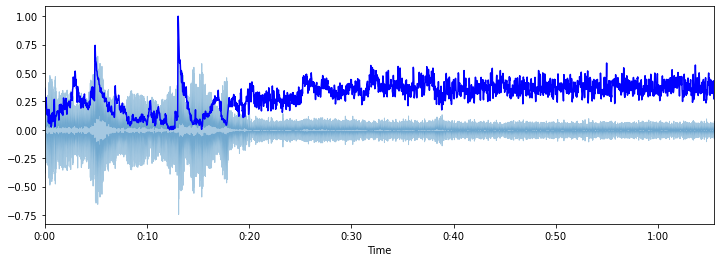

In [86]:
import sklearn
spectral_centroids4 = librosa.feature.spectral_centroid(aud4, sr=SR4)[0]
print(spectral_centroids1.shape)

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids4))
t = librosa.frames_to_time(frames)
print(t.shape)

spectral_centroids4 = (spectral_centroids4 - spectral_centroids4.min(axis=0)) / (spectral_centroids4.max(axis=0) - spectral_centroids4.min(axis=0))
spectral_centroids4 = spectral_centroids4 * (spectral_centroids4.max(axis =0) - spectral_centroids4.min(axis = 0)) + spectral_centroids4.min(axis=0)


#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(aud4, sr=SR4, alpha=0.4)
print(spectral_centroids4.shape)

plt.plot(t, spectral_centroids4, color='b')